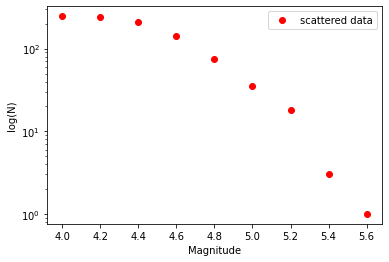

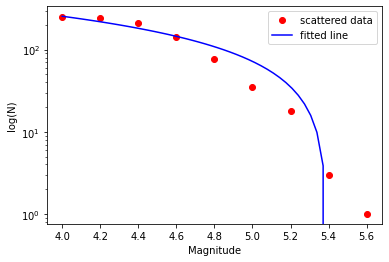

Log(N)= 989.07 -183.42 x M


In [58]:
#Assignment2
#Name: Colin Böhrkircher

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# reading the Data 

#eqdata = pd.read_csv('Digibau3 Assignment2.csv', sep=',')

eq_df = pd.read_csv('Digibau3 Assignment2.csv')     #reading the Data from the .csv-File

# count the repetition of each notation of the MagType, Call MagType with max. repetition MagType_max

def repetition():                       #brute force but working 
    
    magtype = np.array(eq_df.MagType)  
    
    mb     = np.count_nonzero(magtype == 'mb')       #counting the amount of MagType mb  
    MLv    = np.count_nonzero(magtype == 'MLv')      #counting the amount of MagType MLv 
    M      = np.count_nonzero(magtype == 'M')        #counting the amount of MagType M 
    Mw     = np.count_nonzero(magtype == 'Mw')       #counting the amount of MagType Mw 
    MwmB   = np.count_nonzero(magtype == 'Mw(mB)')   #counting the amount of MagType MwmB 

    magtype_list = [mb, MLv, M, Mw, MwmB]            #attaching the counted values to a list

    max_value= max(magtype_list)                     #searching the highest value
    max_index= magtype_list.index(max_value)         #searching for the Index of the highest value


    if max_index==0:                                     #finding the right MagType for the Index with the highest Value
        MagType_max = 'mb'                    
    if max_index==1:
        MagType_max = 'MLv'   
    if max_index==2:
       MagType_max = 'M'
    if max_index==3:
        MagType_max = 'Mw'
    if max_index==4:
        MagType_max = 'Mw(mB)'
    return MagType_max

MagType_max = repetition() #attaching the MagType_max 

# defining interval for the given data 

 
interval= [ 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6 ]   #defining the intervals for the given Data, 
                                                            #minimum value is 4.0 and maximum value is 5.6 for the MagType_max = 'mb'

# calculating N as the cumulative number of earthquakes with magnitude higher than M

def calc_N():                               
    
    N_list = []
    
    for i in interval:   
        filt = (eq_df['MagType'] == MagType_max) & (eq_df['Magnitude'] >= i ) # filtering the dataframe for the right MagType and for Magnitudes with an higher value than i    
        temp_eq_df= eq_df[filt]                                               # creating a temporary dataframe
        N_list.append(temp_eq_df['Magnitude'].count())                        # count the amount of values in the temporary dataframe and adding them to a list
    
    return N_list

N_list = calc_N()      #attaching the values for N in the intervals to a list outside of the function

#Plot the points of M, Log(N) 

def plot_data():
    
    x = interval                # just for better understanding
    y= N_list
     
    plt.xlabel('Magnitude')    #label of the x-axis
    plt.ylabel('log(N)')       #label of the y-axis
    plt.plot( x, y , 'ro', label = 'scattered data') #plotting the scattered data in red with the label scattered data
    plt.yscale("log")          #scaling the y-axis in log 
    plt.legend()               # show the legend
    plt.show()           
    
    return

plot_data() 

#fit a line to the data (SciPy) and plot the fitted line with the messured data

def plot_data_fit():
    
    x = interval            # just for better understanding
    y= N_list
    
    lin_out = stats.linregress( x, y)      #linear regression for the scattered data & attaching the values of the linear regression to a list
    #print(np.min(x))
    x_fit = np.linspace(np.min(x), np.max(x)) 
    y_fit = x_fit*lin_out[0] + lin_out[1]
    
    
    plt.xlabel('Magnitude')   #label of the x-axis  
    plt.ylabel('log(N)')      #label of the y-axis
    plt.plot( x, y ,'ro' ,label = 'scattered data') #plotting the scattered data in red with the label scattered data
    plt.plot(x_fit, y_fit,'b', label = 'fitted line') #plotting the fitted line with the label fitted line
    plt.yscale("log")         #scaling the y-axis in log 
    plt.legend()              # show the legend
    plt.show()
    
    return lin_out[0],lin_out[1]

lin_out=plot_data_fit()

# Plot a figure with the fitted line and the scattered data 



#report equation for the fitted line

def print_equation():
    print('Log(N)=', round(lin_out[1], 2) , round(lin_out[0], 2), 'x M')

print_equation() 
